In [51]:
import pandas as pd
import csv
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from scipy.stats import linregress

In [52]:
kindle_csv = "./kindle_data_clean.csv"
df = pd.read_csv(kindle_csv)
df

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
...,...,...,...,...,...,...,...,...,...,...
982592,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600
982593,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600
982594,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600
982595,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600


In [130]:
# New columns for helpful, unhelpful stats

helpful = []
unhelpful = []

for x in df.index:
    helpful.append(df["helpful"][x][1])
    unhelpful.append(df["helpful"][x][4])
    
df["Helpful"] = helpful
df["Unhelpful"] = unhelpful

df

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful,Unhelpful
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,0,0
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2,2
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2,2
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,1,1
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
982590,982612,B00M13FNSS,"[2, 2]",4,Dre is quite possibly the worst character I h...,"07 23, 2014",A76D0PDO97IIJ,Amazon Customer,Dre is quite possibly the worst character I ha...,1406073600,2,2
982592,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600,2,2
982593,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600,0,0
982594,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600,1,1


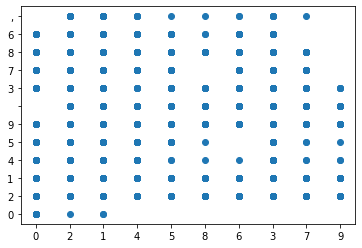

In [129]:
plt.scatter(df["Helpful"], df["Unhelpful"])

In [119]:
# Top Reviewer

df_group = df.groupby("reviewerID")
top_reviewer = df_group.count().sort_values("reviewerName", ascending = False).index[0]

df.loc[df["reviewerID"] == top_reviewer]

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
603,603,B000R93D4Y,"[8, 8]",4,"Magical, Mystical, Sensual . . . Enjoyable! Wh...","01 17, 2013",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",Intriguing Read,1358380800
834,834,B000VKVZQM,"[2, 2]",4,Mix one carefree man with one closeted man and...,"12 6, 2010",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",Wonderful Read,1291593600
1139,1139,B0012W11D0,"[0, 0]",5,Who knew community service could be so...sexy?...,"12 15, 2010",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",Irresistable Read,1292371200
1557,1557,B001892DGG,"[0, 0]",5,Originally posted at: [...]If you enjoy parano...,"09 10, 2010",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",One for the Keeper Shelf,1284076800
1995,1995,B001CN45IC,"[2, 3]",5,"Originally Posted at: [...]Dark, mysterious an...","05 13, 2010",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...","Dark, mysterious and oh so sexy.",1273708800
...,...,...,...,...,...,...,...,...,...,...
939465,939487,B00KHUQLSI,"[0, 0]",4,"Ooh, I loved this one! Jenika Snow did it agai...","07 1, 2014",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",Good Reading,1404172800
943904,943926,B00KLDXECW,"[0, 0]",4,What&#8217;s better than one sexy male? How ab...,"07 18, 2014",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",Good Reading,1405641600
964152,964174,B00L3GKTZ6,"[0, 0]",3,Em Petrova is a new to me author and I will be...,"07 3, 2014",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",Interesting Read,1404345600
965610,965632,B00L5DUS2G,"[0, 0]",3,Phoenix hasn&#8217;t survived this long by tak...,"07 10, 2014",A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",Has Promise,1404950400
